In [12]:
from selenium import webdriver
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
%matplotlib inline

class instagram_hashtags:
    def hashtag_crawling(self, keyword, path, number):
        self.keyword = keyword
        self.path = path
        self.number = number
        
        tag_data = []
        words = []
        words_list = []
        
        driver = webdriver.Chrome(path)
        driver.get('https://www.instagram.com/explore/tags/' + keyword)
        
        time.sleep(3)
        driver.find_element_by_xpath("//div[@class = '_9AhH0']").click()
        
        for i in range(number):
            time.sleep(2)
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            
            tag_data.append(soup.select('div.C4VMK > span > a'))
            
            driver.find_element_by_xpath("//a[@class = 'HBoOv coreSpriteRightPaginationArrow']").click()
        
        for x in range(number):
            for y in range(len(tag_data[x])):
                words += tag_data[x][y]
                
        for i in words:
            if i[0] == '#':
                words_list.append(i)
                
        return words_list
                
    def save_file_wordcloud(self, data_path, words_list):
        self.data_path = data_path
        self.words_list = words_list
        
        f = open(data_path, 'w')
        for i in range(len(words_list)):
            f.write(words_list[i] + "\n")
        f.close()
        
        text = open(data_path).read()
        
        wordcloud = WordCloud(max_font_size = 30, font_path = '/Users/markmac/Fonts/NanumSquareBold.ttf', background_color = 'white').generate(text)
        
        return wordcloud
    
    def Visualization(self, wordcloud_data, size = (40, 40), interpolation = 'bilinear', data_save = 'test'):
        self.size = size
        self.wordcloud_data = wordcloud_data
        self.interpolation = interpolation
        self.data_save = data_save
        
        plt.figure(figsize = size)
        plt.imshow(wordcloud, interpolation = interpolation)
        plt.axis('off') # x, y축 scale(숫자) 없애기.
        plt.show()
        plt.savefig(data_save) # 이미지 파일 저장

In [13]:
ih = instagram_hashtags()

In [15]:
tag_data = ih.hashtag_crawling('쇼미더머니777', '/Users/markmac/Downloads/chromedriver', 1000)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//a[@class = 'HBoOv coreSpriteRightPaginationArrow']"}
  (Session info: chrome=71.0.3578.98)
  (Driver info: chromedriver=2.45.615355 (d5698f682d8b2742017df6c81e0bd8e6a3063189),platform=Mac OS X 10.13.6 x86_64)


In [16]:
words_data = ih.save_file_wordcloud('/Users/markmac/Downloads/word_data.txt', tag_data)

In [17]:
words_data.words_

{'작곡': 1.0,
 '피아노': 0.4,
 'piano': 0.4,
 '음악': 0.4,
 'music': 0.4,
 '맞팔해요': 0.4,
 '비트메이킹': 0.2,
 '음스타그램': 0.2,
 'beat': 0.2,
 '작곡스타그램': 0.2,
 '독학': 0.2,
 '피아노스타그램': 0.2,
 'pianocover': 0.2,
 'pianogram': 0.2,
 'pianostagram': 0.2,
 '독학스타그램': 0.2,
 '독학그램': 0.2,
 '음악그램': 0.2,
 '음악스타그램': 0.2,
 'musicstagram': 0.2,
 '인스타': 0.2,
 '인스타그램': 0.2,
 'insta': 0.2,
 'instagram': 0.2,
 '작업중인곡': 0.2,
 '편곡': 0.2,
 '취미': 0.2,
 '취미생활': 0.2,
 '키디비': 0.2,
 '블랙넛': 0.2,
 '힙합': 0.2,
 'hiphop': 0.2,
 '카드뉴스': 0.2,
 '뉴스': 0.2,
 'news': 0.2,
 'daily': 0.2,
 '이슈': 0.2,
 '오늘의뉴스': 0.2,
 '징역': 0.2,
 '맞팔': 0.2,
 '맞팔반사': 0.2,
 'f4f': 0.2,
 '맞팔선팔': 0.2,
 '래퍼': 0.2,
 '이데일리': 0.2,
 '연예': 0.2,
 '스타': 0.2,
 'star': 0.2,
 '영스타': 0.2,
 '냉삼겹': 0.2,
 '먹스타그램': 0.2,
 '삼겹살': 0.2,
 '소주': 0.2,
 '보해소주': 0.2,
 '대선소주': 0.2,
 '신년회': 0.2,
 '첼로': 0.2,
 '기타': 0.2,
 '뮤지션': 0.2,
 'foodstagram': 0.2,
 'soju': 0.2,
 'newyearsparty': 0.2,
 'composer': 0.2,
 'musician': 0.2,
 'guitar': 0.2,
 'cello': 0.2}

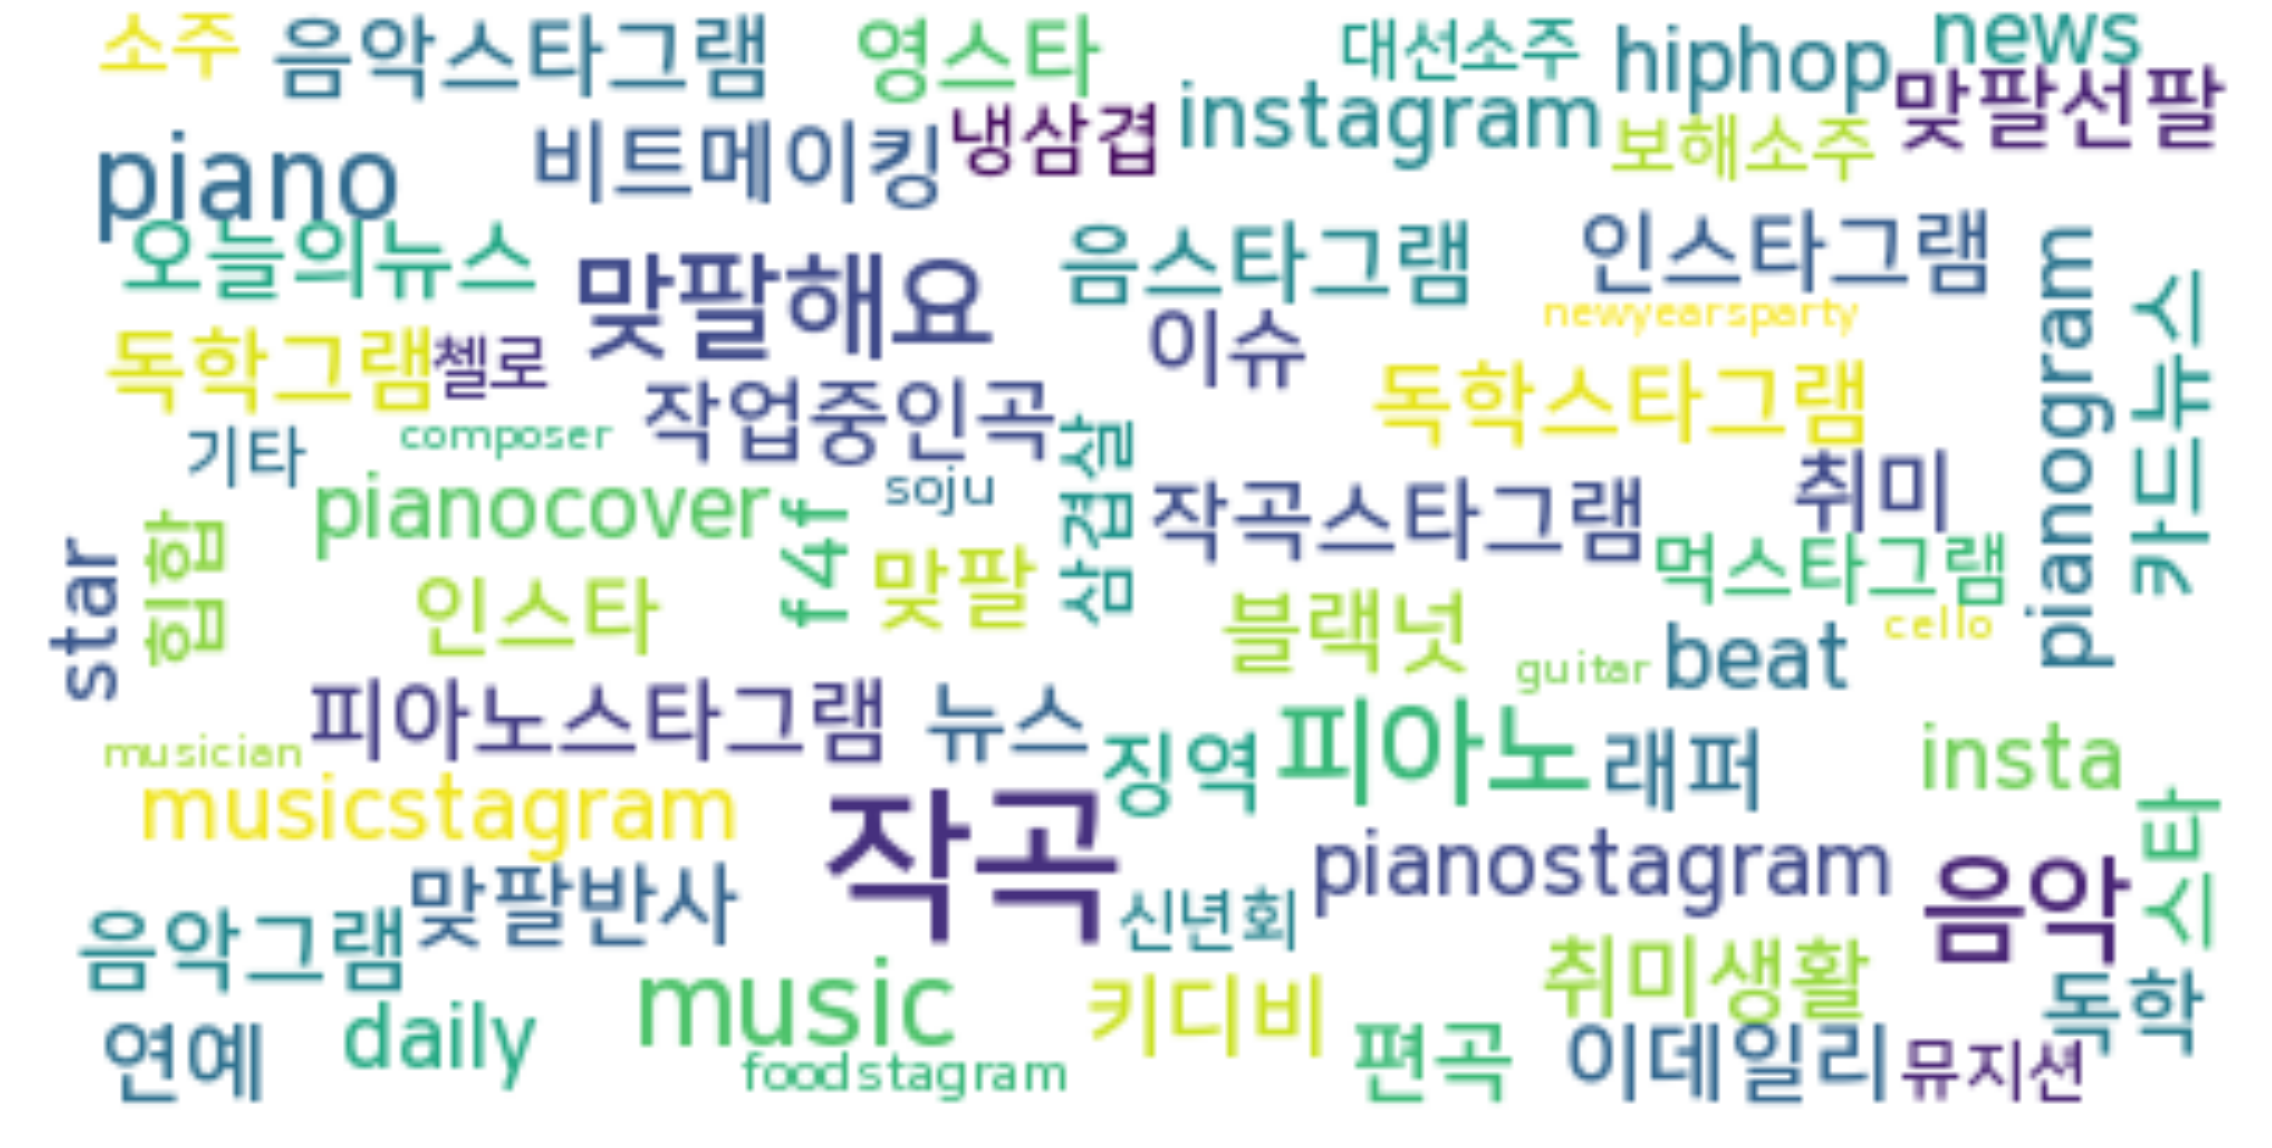

<Figure size 432x288 with 0 Axes>

In [18]:
aa = ih.Visualization(words_data)